In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to remove warnings do the following
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Sathish'

In [3]:
import os 
os.chdir("Downloads")

# 1. Download the dataset: Dataset
# 2. Load the dataset into the tool.

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.
# Univariate Analysis

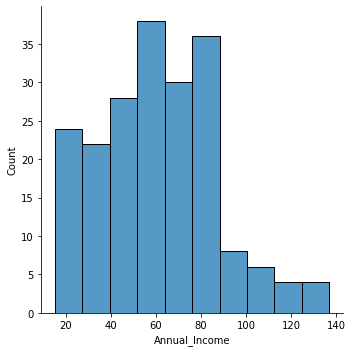

In [7]:
sns.displot(df.Annual_Income)

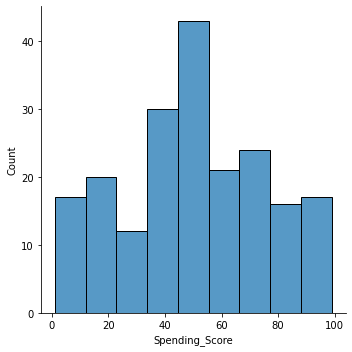

In [8]:
sns.displot(df.Spending_Score)

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Spending_Score'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

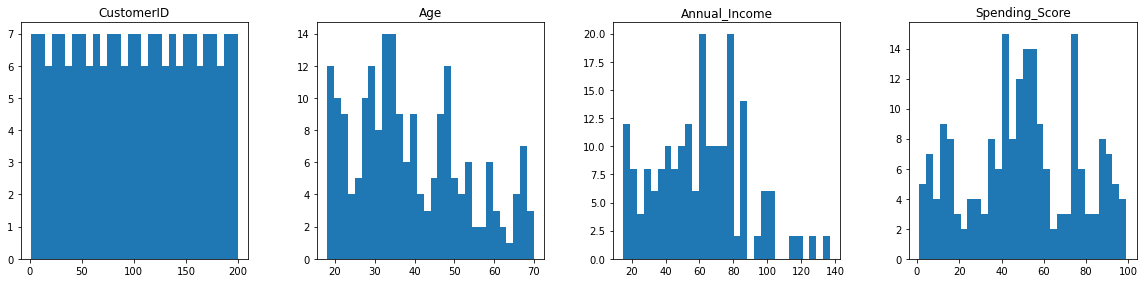

In [9]:
df.hist(figsize=(20,10),grid=False,layout=(2,4),bins=30)

# Bi- Variate Analysis

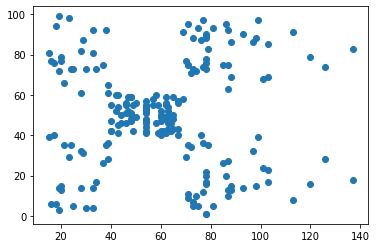

In [10]:
plt.scatter(df.Annual_Income,df.Spending_Score)

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

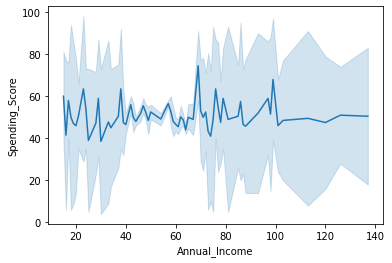

In [11]:
sns.lineplot(df.Annual_Income,df.Spending_Score)

# Multi-Variate Analysis

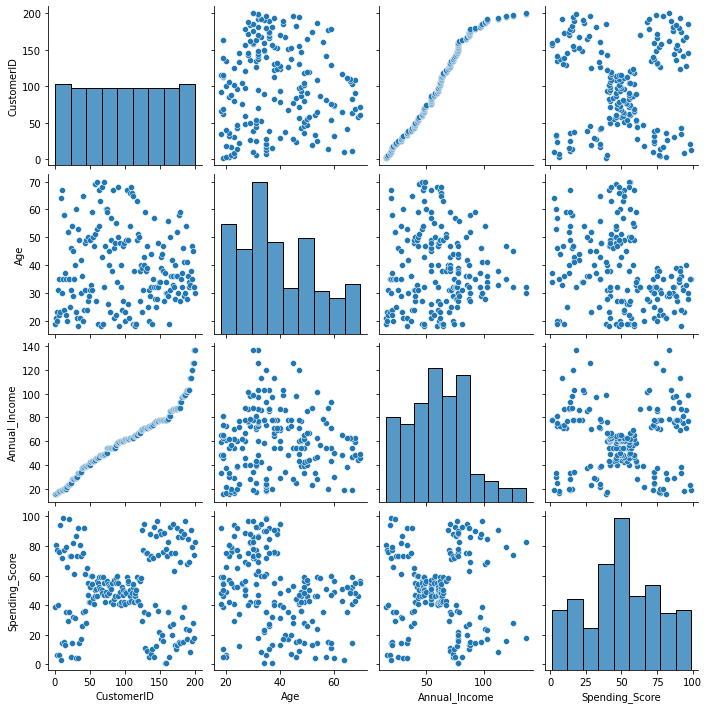

In [12]:
sns.pairplot(df)

<AxesSubplot:>

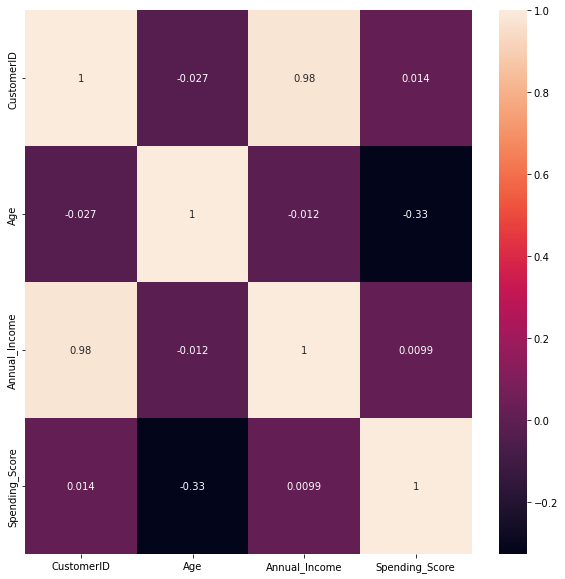

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# 4. Perform descriptive statistics on the dataset.

In [14]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 5. Check for Missing values and deal with them.

In [16]:
df.isnull().sum() 

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# 6. Find the outliers and replace them outliers

<AxesSubplot:xlabel='Annual_Income'>

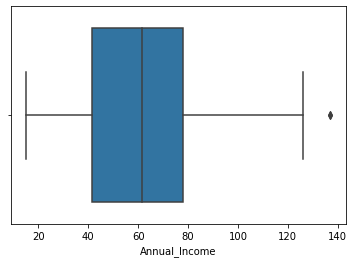

In [17]:
sns.boxplot(df.Annual_Income)

<AxesSubplot:xlabel='Spending_Score'>

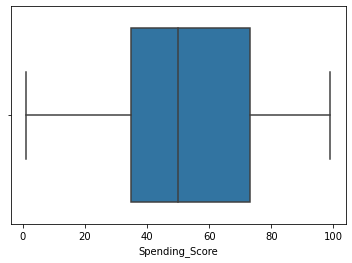

In [18]:
sns.boxplot(df.Spending_Score)

61.5


<AxesSubplot:xlabel='Annual_Income'>

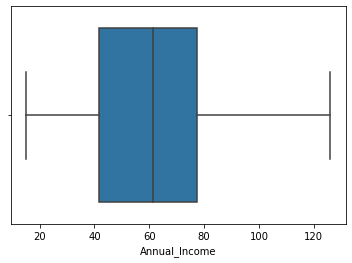

In [19]:
#replacing the outliers
median=df['Annual_Income'].median()
print(median)
df['Annual_Income']=df['Annual_Income'].mask(df['Annual_Income']>130,61.5)
sns.boxplot(df['Annual_Income'])

# 7. Check for Categorical columns and perform encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# 8. Scaling the data

In [21]:
data=df.drop(['CustomerID'],axis=1)
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [22]:
#scalling data
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
#scalingData=scale.fit_transform(data.iloc[:,:3])
scalingData=scale.fit_transform(data)
scalingData

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

# 9. Perform any of the clustering algorithms

In [23]:
from sklearn import cluster

In [24]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [25]:
error

[963713.675,
 381436.104860486,
 267939.1070836786,
 191458.22767094016,
 153440.3615817258,
 119069.64011047292,
 101207.28033910535,
 85587.68268953267,
 76477.1992151242,
 68494.14545083062]

In [26]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,12))

for i in k:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(data)
  TWSS.append(kmeans.inertia_)

TWSS

[201152.1081841432,
 139326.23321730687,
 100349.31619915174,
 71419.31019600156,
 54455.93879921248,
 48690.465943332725,
 43129.16053362864,
 39462.985349472365,
 35893.638233385245,
 33283.62624047267]

In [27]:
#selecting  3 clusters
model=KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

# Visualization

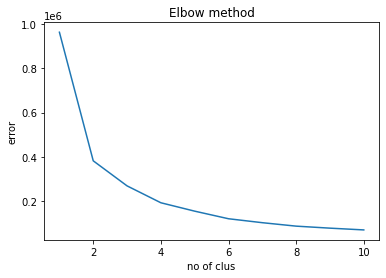

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

# 10. Add the cluster data with the primary dataset

In [29]:
#get the labels
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [30]:
#converting in series
mb=pd.Series(model.labels_)

In [31]:
df['cluster'] =mb #kmeans.fit_predict(df)

In [32]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,1,19,15.0,39,2
1,2,1,21,15.0,81,2
2,3,0,20,16.0,6,2
3,4,0,23,16.0,77,2
4,5,0,31,17.0,40,2
...,...,...,...,...,...,...
195,196,0,35,120.0,79,1
196,197,0,45,126.0,28,0
197,198,1,32,126.0,74,1
198,199,1,32,61.5,18,0


# 11. Split the data into dependent and independent variables.

# Independent variable


In [33]:
idv=df.iloc[:,:-1]#independent variables
idv

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
...,...,...,...,...,...
195,196,0,35,120.0,79
196,197,0,45,126.0,28
197,198,1,32,126.0,74
198,199,1,32,61.5,18


# Dependent variable

In [34]:
dv=df.iloc[:,-1]#dependent variables
dv

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    0
197    1
198    0
199    1
Name: cluster, Length: 200, dtype: int32

# 12. Split the data into training and testing

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(idv,dv,test_size=0.3,random_state=7)
X_train,X_test

(     CustomerID  Gender  Age  Annual_Income  Spending_Score
 88           89       0   34           58.0              60
 58           59       0   27           46.0              51
 113         114       1   19           64.0              46
 149         150       1   34           78.0              90
 36           37       0   42           34.0              17
 ..          ...     ...  ...            ...             ...
 151         152       1   39           78.0              88
 67           68       0   68           48.0              48
 25           26       1   29           28.0              82
 196         197       0   45          126.0              28
 175         176       0   30           88.0              86
 
 [140 rows x 5 columns],
      CustomerID  Gender  Age  Annual_Income  Spending_Score
 86           87       0   55           57.0              58
 120         121       1   27           67.0              56
 22           23       0   46           25.0              

In [36]:
print(y_train,y_test.shape)

88     2
58     2
113    2
149    1
36     2
      ..
151    1
67     2
25     2
196    0
175    1
Name: cluster, Length: 140, dtype: int32 (60,)


# 13. MODEL BUILDING

In [37]:
from sklearn import svm #SVM REFER SUPPORT VECTOR MACHINE
svm_model=svm.SVC(kernel='linear')

# 14. Train the Model

In [38]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

# 15. Test the Model

In [39]:
svm_pred=svm_model.predict(X_test)
svm_pred

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2])

# 16. Measure the performance using Evaluation Metrics

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,svm_pred)

1.0

In [49]:
metrics.confusion_matrix(y_test,svm_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 37]], dtype=int64)

In [50]:
pd.crosstab(y_test,svm_pred)

col_0,0,1,2
cluster,,,
0,10,0,0
1,0,13,0
2,0,0,37


In [51]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

